# Germany EDA

## Our goal
A year since the beginning of the pandemic, governments and their constituents are eager for a safe return to public life - but lack the data visibility and tools they need to make informed decisions.
This project aims to help governments establish a **safe planning schema** for de- and re-confinement, and also to **navigate upcoming waves** of viral transmission and other adverse impacts. 

Our goal is to develop an ML prototype capable of **forecasting safe dates** for adjusting confinement protocol and other measures for a given region, and **simulate the impact** of different timelines on likely transmission rates and population health outcomes.

## This notebook
This notebook takes in raw data on counts of patients as well as other dependent factors of Covid-19, collected from different countries of the world. The target country is **Germany**- thus, cleaning and analysis of variables in this country is performed.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

**Extraction**

Let us first read the data as a pandas dataframe, and then extract data for Germany.

In [2]:
covid_data= pd.read_csv('../dataset/owid-covid-data.csv')

In [3]:
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50006,NaN,NaN,International,2020-10-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50007,NaN,NaN,International,2020-10-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50008,NaN,NaN,International,2020-10-13,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50009,NaN,NaN,International,2020-10-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covid_data.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

In [5]:
covid_data['date']=pd.to_datetime(covid_data['date'])

In [6]:
germany_data=covid_data[covid_data['location']=='Germany']
germany_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11750,DEU,Europe,Germany,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11751,DEU,Europe,Germany,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11752,DEU,Europe,Germany,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11753,DEU,Europe,Germany,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11754,DEU,Europe,Germany,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


In [7]:
germany_data.shape

(290, 41)

In [8]:
germany_data=germany_data.reset_index()
germany_data.drop('index', axis=1, inplace=True)
germany_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,DEU,Europe,Germany,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
1,DEU,Europe,Germany,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
2,DEU,Europe,Germany,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
3,DEU,Europe,Germany,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
4,DEU,Europe,Germany,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,DEU,Europe,Germany,2020-10-11,322864.0,3483.0,3375.286,9615.0,11.0,12.286,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
286,DEU,Europe,Germany,2020-10-12,325331.0,2467.0,3530.286,9621.0,6.0,12.429,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
287,DEU,Europe,Germany,2020-10-13,329453.0,4122.0,3742.143,9634.0,13.0,12.571,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
288,DEU,Europe,Germany,2020-10-14,334585.0,5132.0,4071.286,9677.0,43.0,16.429,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


In [9]:
print(germany_data.loc[0, 'date'])
print(germany_data.loc[289, 'date'])

2019-12-31 00:00:00
2020-10-15 00:00:00


Thus, Germany's data has been extracted from the parent dataset.
We can observe that we have daily data, starting from 31 December 2019 to 15 October 2020- a total of 290 days.

**Removing NaN values**

Our next step is to remove/replace all NaN values in our dataset, so that we can prepare it for prediction purposes.

<AxesSubplot:>

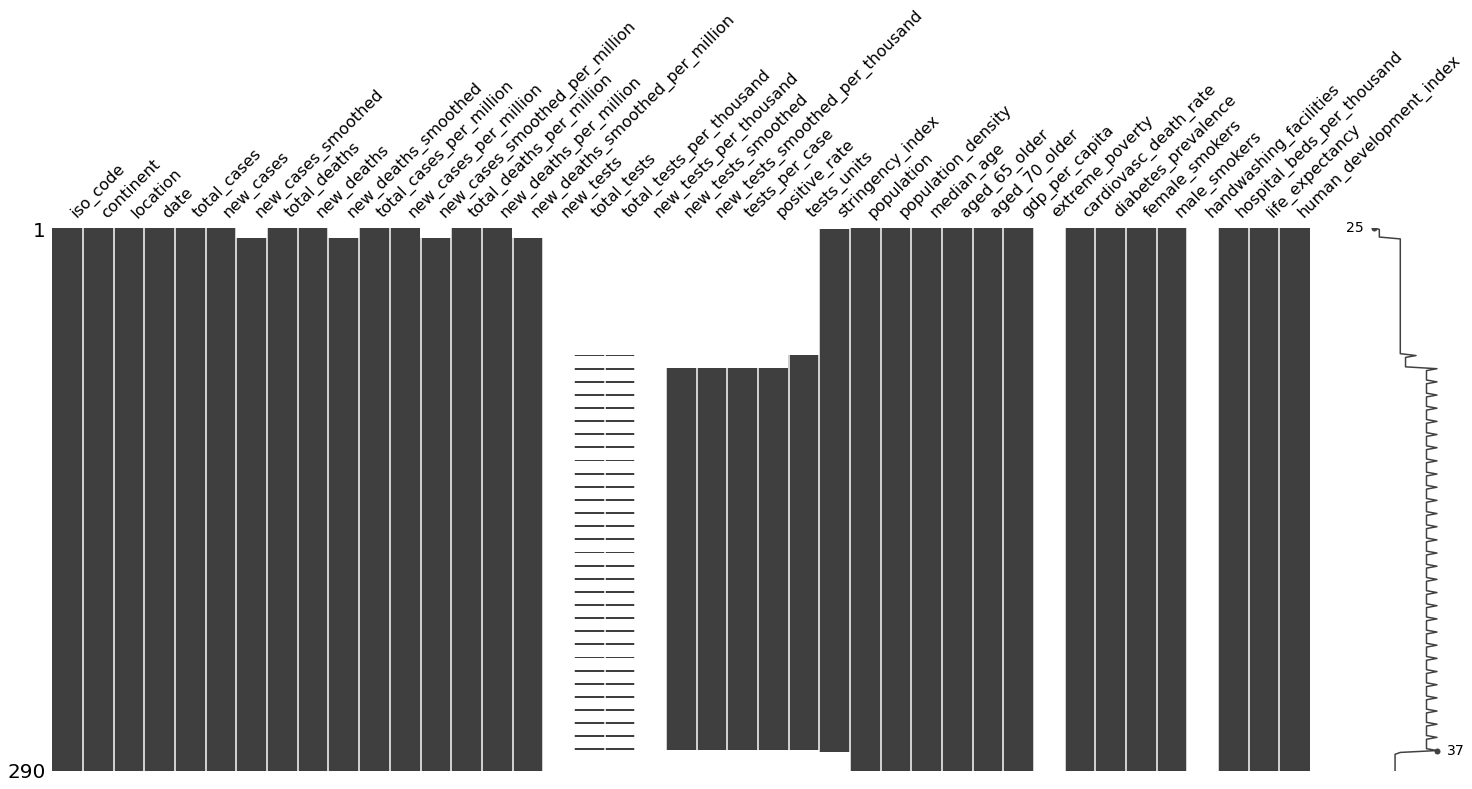

In [10]:
#let us visualize missing values as a matrix
msno.matrix(germany_data)

In [11]:
germany_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         290 non-null    object        
 1   continent                        290 non-null    object        
 2   location                         290 non-null    object        
 3   date                             290 non-null    datetime64[ns]
 4   total_cases                      290 non-null    float64       
 5   new_cases                        290 non-null    float64       
 6   new_cases_smoothed               284 non-null    float64       
 7   total_deaths                     290 non-null    float64       
 8   new_deaths                       290 non-null    float64       
 9   new_deaths_smoothed              284 non-null    float64       
 10  total_cases_per_million          290 non-null    float64      

We can observe that the columns 'new_tests', 'new_tests_per_thousand', 'extreme_poverty' and 'handwashing_facilities' contain 0 non-null values. Moreover, the columns 'total_tests' and 'total_tests_per_thousand' contain only 31 non-null vaues, which is only about 10.6% of non-null, which is insufficient to help replace the null values. 

Hence these columns cannot be used for analysis. It would be appropriate to drop such columns. 

In [12]:
germany_data= germany_data.drop(['new_tests', 'new_tests_per_thousand', 'extreme_poverty','handwashing_facilities','total_tests','total_tests_per_thousand'],
                               axis=1)

<AxesSubplot:>

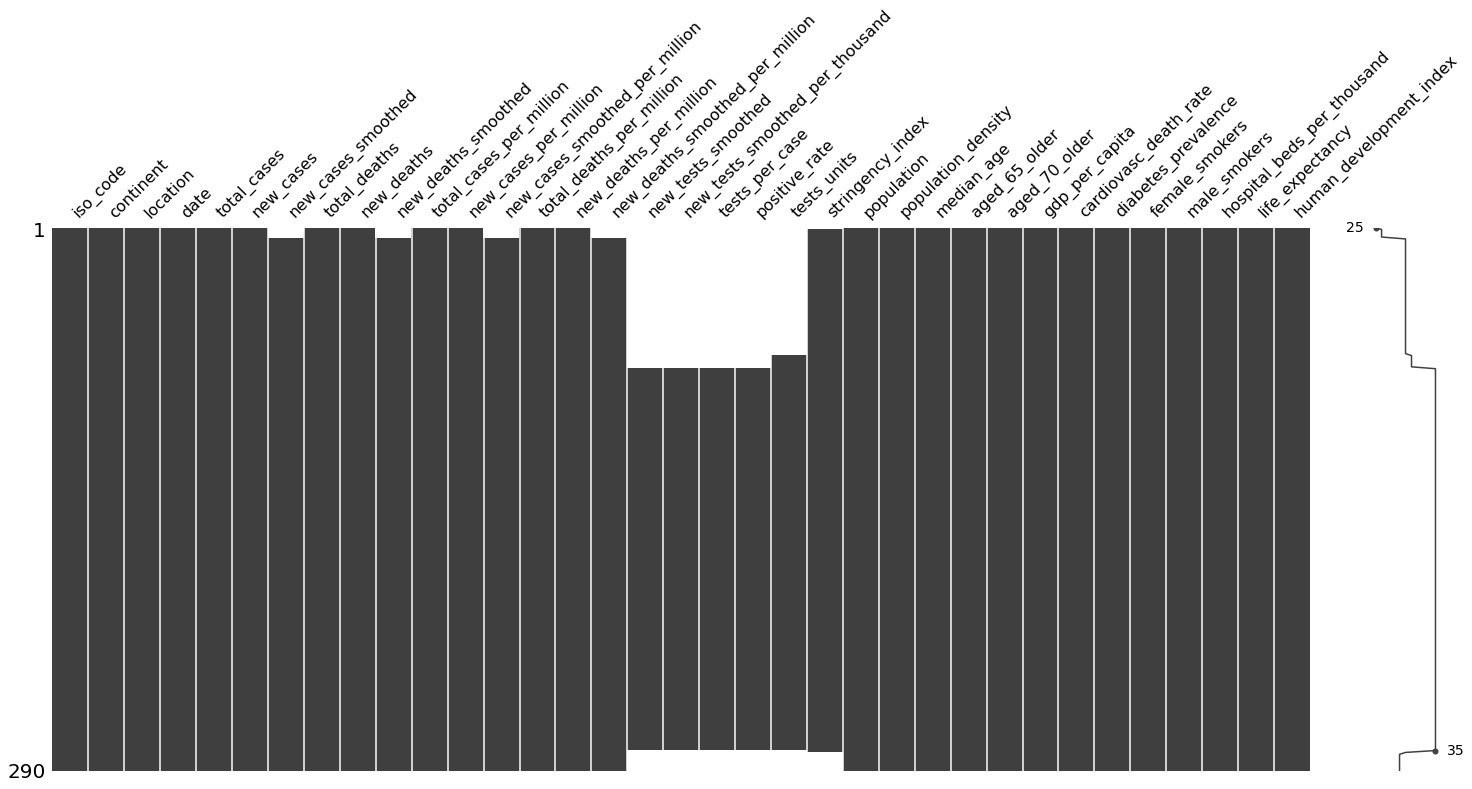

In [13]:
msno.matrix(germany_data)

Now, to fill up Nan values in the rest of the variables. Let us understand their distribution first!

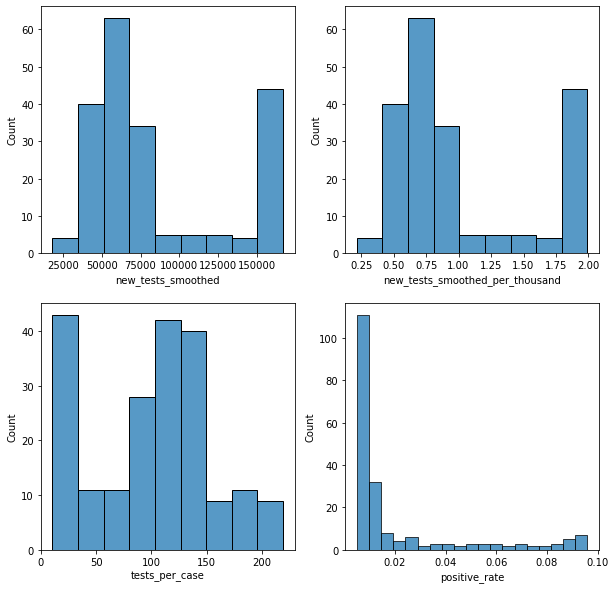

In [14]:

fig=plt.figure()

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)


sns.histplot(germany_data, x='new_tests_smoothed', ax=ax1)
sns.histplot(germany_data, x='new_tests_smoothed_per_thousand', ax=ax2)
sns.histplot(germany_data, x='tests_per_case', ax=ax3)
sns.histplot(germany_data, x='positive_rate', ax=ax4)

fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

In [15]:
germany_data.describe().loc[:,['new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','positive_rate']]

,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate
count,204.000000,204.000000,204.000000,204.000000
mean,85690.705882,1.022770,98.596422,0.021765
std,44744.959892,0.534073,55.669042,0.025668
min,18208.000000,0.217000,10.426000,0.005000
25%,51702.000000,0.616750,45.583250,0.008000
50%,61866.000000,0.738500,112.582500,0.009000
75%,121862.000000,1.454500,130.179750,0.022250
max,166913.000000,1.992000,219.125000,0.096000


From the above figures and data we can derive some conclusion on methods to fill the rows with maximum amount of NaN values. We can fill 'new_tests_smoothed','new_tests_smoothed_per_thousand' and 'tests_per_case' with their means. But since the distribution of 'positive_rate' is far from a normal distribution, we can fill its NaN values with the median.

In [16]:
germany_data['new_tests_smoothed']=germany_data['new_tests_smoothed'].fillna(germany_data['new_tests_smoothed'].mean())

In [17]:
germany_data['new_tests_smoothed_per_thousand']=germany_data['new_tests_smoothed_per_thousand'].fillna(germany_data['new_tests_smoothed_per_thousand'].mean())
germany_data['tests_per_case']=germany_data['tests_per_case'].fillna(germany_data['tests_per_case'].mean())
germany_data['positive_rate']=germany_data['positive_rate'].fillna(germany_data['positive_rate'].mode()[0])

In [18]:
germany_data['tests_units'].value_counts()

tests performed    211
Name: tests_units, dtype: int64

This means 'tests performed' is the only value in the non-null rows. Let us replace the rest of the rows with 'tests performed' also.

In [19]:
germany_data['tests_units']=germany_data['tests_units'].fillna('tests_performed')

Now filling up remaining data with means as well-

In [20]:
means=germany_data[['new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million',
                    'new_deaths_smoothed_per_million','stringency_index']].mean()

germany_data[['new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million',
            'new_deaths_smoothed_per_million','stringency_index']]=germany_data[['new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million',
                                                                                  'new_deaths_smoothed_per_million','stringency_index']].fillna(means)

<AxesSubplot:>

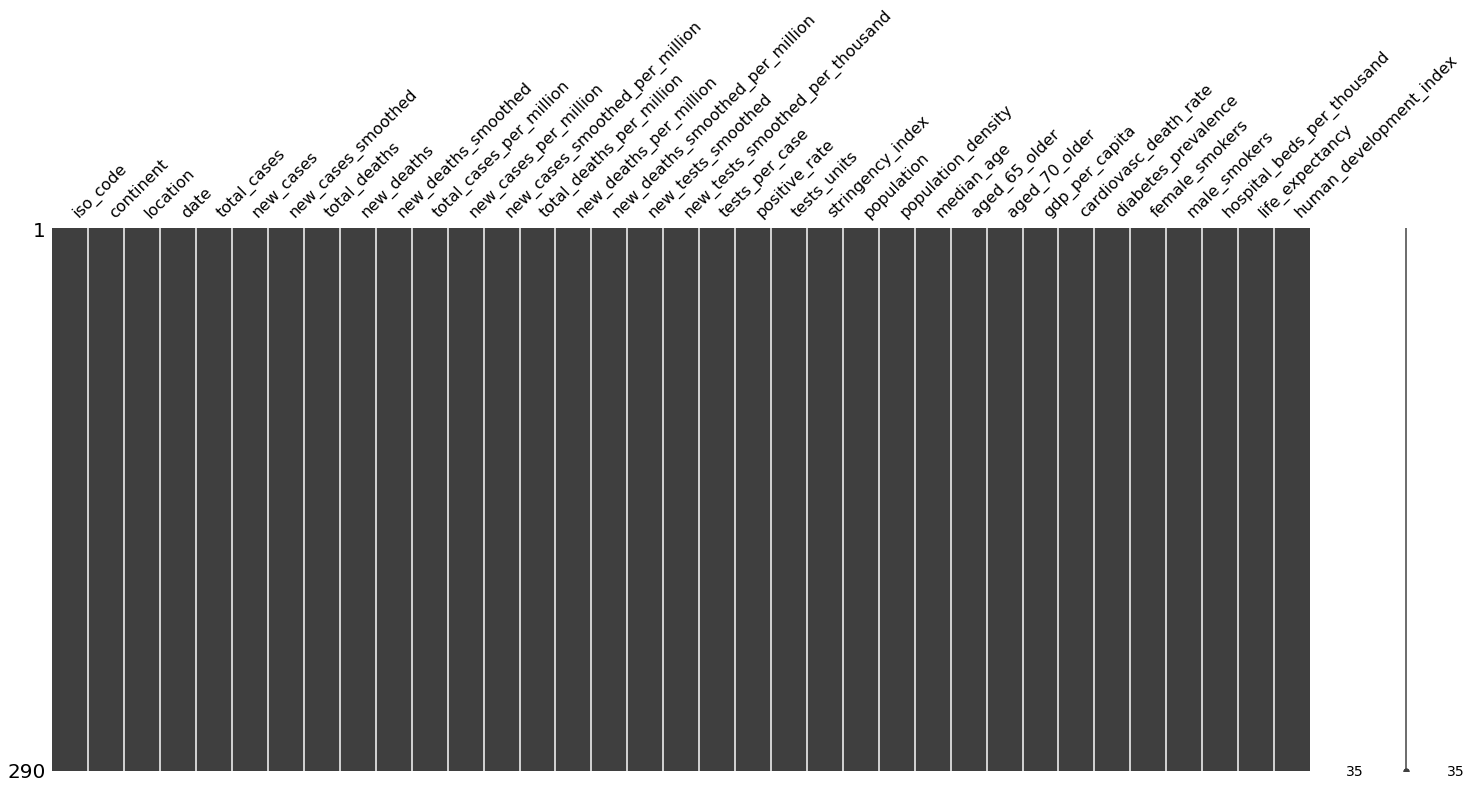

In [21]:
msno.matrix(germany_data)

All NaN values have been removed.


**Univariate analysis**

Now, let us understand the distribution of the variables.

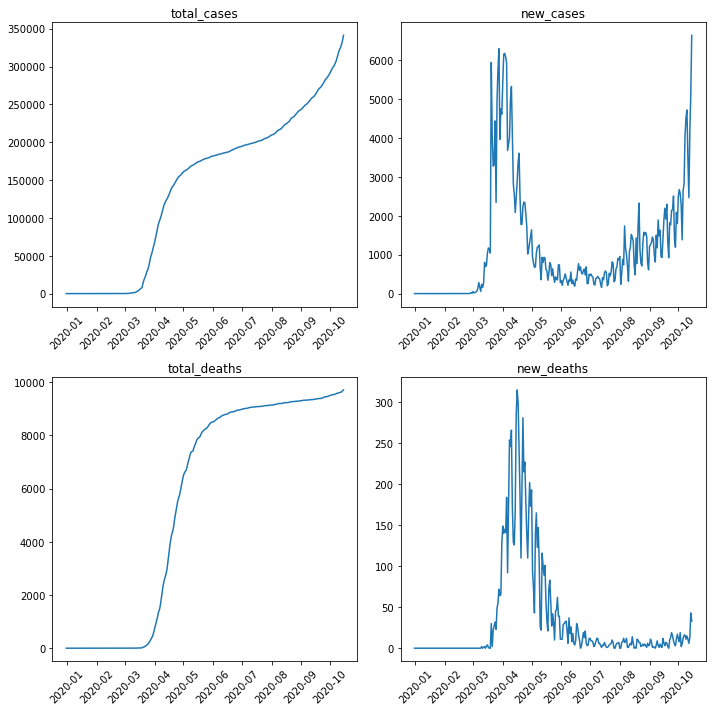

In [22]:
fig2=plt.figure()

ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)

ax1.plot(germany_data['date'],germany_data['total_cases'])
ax1.set_title('total_cases')
ax1.tick_params(axis='x', rotation=45)
ax2.plot(germany_data['date'],germany_data['new_cases'])
ax2.set_title('new_cases')
ax2.tick_params(axis='x', rotation=45)
ax3.plot(germany_data['date'],germany_data['total_deaths'])
ax3.set_title('total_deaths')
ax3.tick_params(axis='x', rotation=45)
ax4.plot(germany_data['date'],germany_data['new_deaths'])
ax4.set_title('new_deaths')
ax4.tick_params(axis='x', rotation=45)

fig2.set_figheight(10)
fig2.set_figwidth(10)
plt.tight_layout()
plt.show()

We can notice that in Germany, peak of cases and deaths occurred in April-May of 2020, increasing a bit in December-January again.

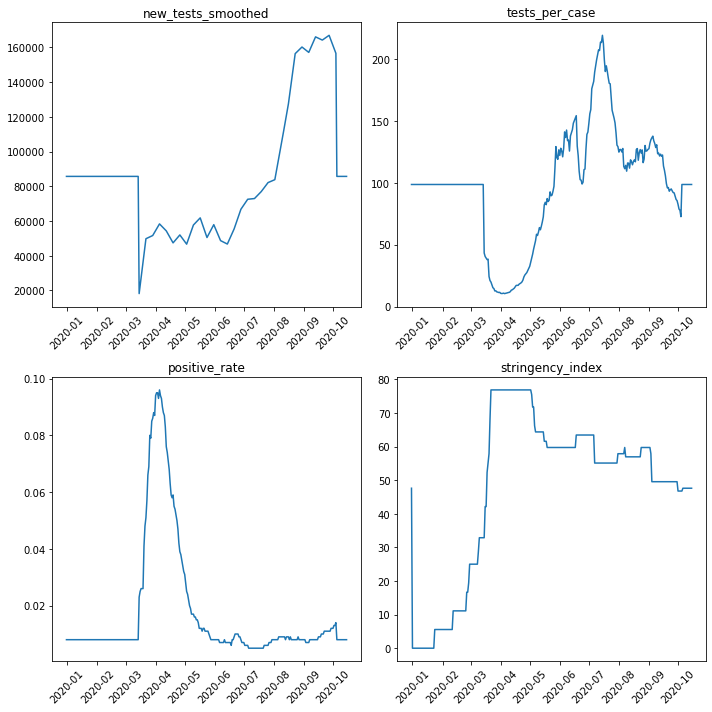

In [23]:
fig3=plt.figure()

ax1=fig3.add_subplot(2,2,1)
ax2=fig3.add_subplot(2,2,2)
ax3=fig3.add_subplot(2,2,3)
ax4=fig3.add_subplot(2,2,4)

ax1.plot(germany_data['date'],germany_data['new_tests_smoothed'])
ax1.set_title('new_tests_smoothed')
ax1.tick_params(axis='x', rotation=45)
ax2.plot(germany_data['date'],germany_data['tests_per_case'])
ax2.set_title('tests_per_case')
ax2.tick_params(axis='x', rotation=45)
ax3.plot(germany_data['date'],germany_data['positive_rate'])
ax3.set_title('positive_rate')
ax3.tick_params(axis='x', rotation=45)
ax4.plot(germany_data['date'],germany_data['stringency_index'])
ax4.set_title('stringency_index')
ax4.tick_params(axis='x', rotation=45)

#Stringency index-- This is a composite measure based on nine response indicators including school closures, workplace closures, and
#travel bans, rescaled to a value from 0 to 100 (100 = strictest). Basically strictness of preventive measures.

fig3.set_figheight(10)
fig3.set_figwidth(10)
plt.tight_layout()
plt.show()

We can observe that strictness of preventive measures was increased in March-Aprilof 2020, most probably due to increasing number of cases and deaths by that time. 

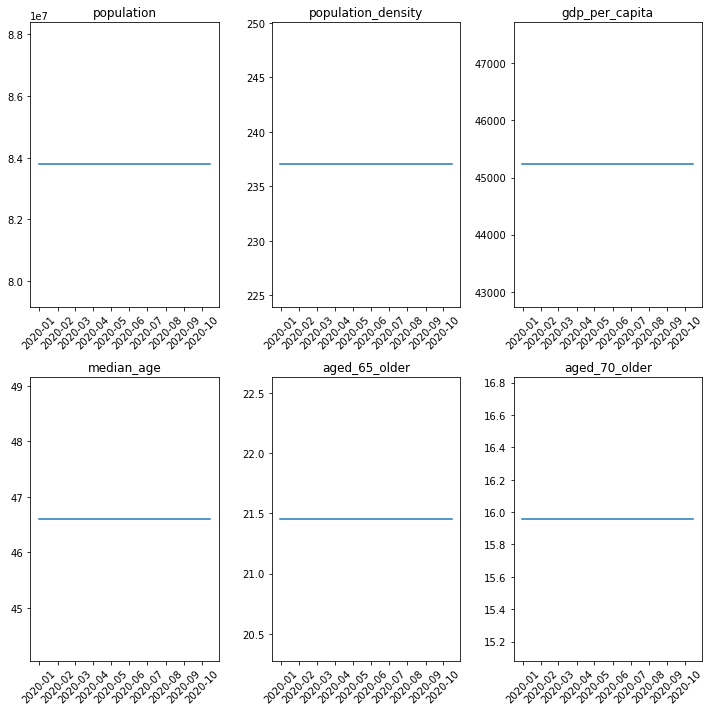

In [24]:
fig4=plt.figure()

ax1=fig4.add_subplot(2,3,1)
ax2=fig4.add_subplot(2,3,2)
ax3=fig4.add_subplot(2,3,3)
ax4=fig4.add_subplot(2,3,4)
ax5=fig4.add_subplot(2,3,5)
ax6=fig4.add_subplot(2,3,6)

ax1.plot(germany_data['date'],germany_data['population'])
ax1.set_title('population')
ax1.tick_params(axis='x', rotation=45)
ax2.plot(germany_data['date'],germany_data['population_density'])
ax2.set_title('population_density')
ax2.tick_params(axis='x', rotation=45)
ax3.plot(germany_data['date'],germany_data['gdp_per_capita'])
ax3.set_title('gdp_per_capita')
ax3.tick_params(axis='x', rotation=45)
ax4.plot(germany_data['date'],germany_data['median_age'])
ax4.set_title('median_age')
ax4.tick_params(axis='x', rotation=45)
ax5.plot(germany_data['date'],germany_data['aged_65_older'])
ax5.set_title('aged_65_older')
ax5.tick_params(axis='x', rotation=45)
ax6.plot(germany_data['date'],germany_data['aged_70_older'])
ax6.set_title('aged_70_older')
ax6.tick_params(axis='x', rotation=45)

fig4.set_figheight(10)
fig4.set_figwidth(10)
plt.tight_layout()
plt.show()

In [25]:
print(germany_data['population'].value_counts())
print(germany_data['population_density'].value_counts())
print(germany_data['gdp_per_capita'].value_counts())
print(germany_data['median_age'].value_counts())
print(germany_data['aged_65_older'].value_counts())
print(germany_data['aged_70_older'].value_counts())

83783945.0    290
Name: population, dtype: int64
237.016    290
Name: population_density, dtype: int64
45229.245    290
Name: gdp_per_capita, dtype: int64
46.6    290
Name: median_age, dtype: int64
21.453    290
Name: aged_65_older, dtype: int64
15.957    290
Name: aged_70_older, dtype: int64


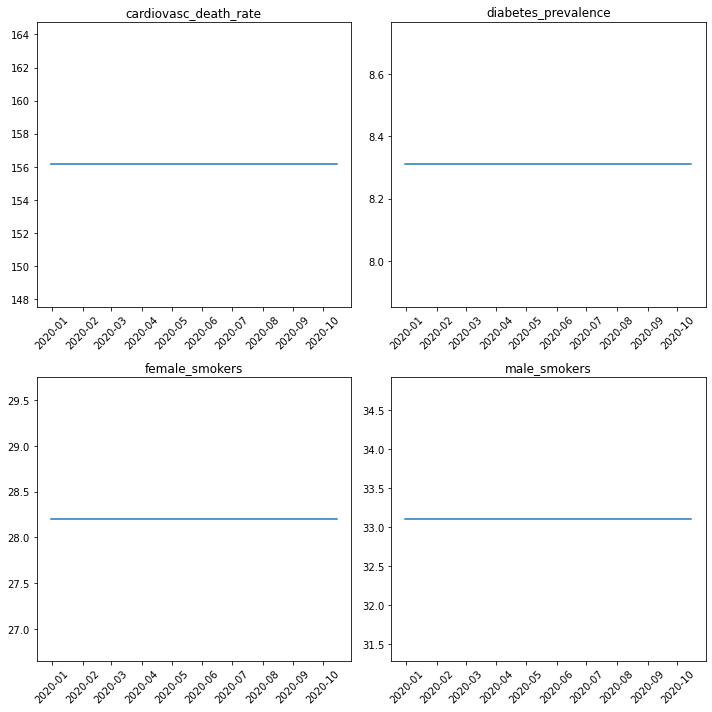

In [26]:
fig5=plt.figure()

ax1=fig5.add_subplot(2,2,1)
ax2=fig5.add_subplot(2,2,2)
ax3=fig5.add_subplot(2,2,3)
ax4=fig5.add_subplot(2,2,4)

ax1.plot(germany_data['date'],germany_data['cardiovasc_death_rate'])
ax1.set_title('cardiovasc_death_rate')
ax1.tick_params(axis='x', rotation=45)
ax2.plot(germany_data['date'],germany_data['diabetes_prevalence'])
ax2.set_title('diabetes_prevalence')
ax2.tick_params(axis='x', rotation=45)
ax3.plot(germany_data['date'],germany_data['female_smokers'])
ax3.set_title('female_smokers')
ax3.tick_params(axis='x', rotation=45)
ax4.plot(germany_data['date'],germany_data['male_smokers'])
ax4.set_title('male_smokers')
ax4.tick_params(axis='x', rotation=45)

fig5.set_figheight(10)
fig5.set_figwidth(10)
plt.tight_layout()
plt.show()

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(germany_data.corr())

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.240324,0.237195,0.959784,0.014360,0.027616,1.000000,0.240323,0.237195,0.959784,0.014372,0.027616,0.409735,0.409736,0.323569,-0.183667,0.601693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,0.240324,1.000000,0.922101,0.030481,0.507997,0.393840,0.240324,1.000000,0.922102,0.030481,0.508003,0.393837,-0.040229,-0.040223,-0.567503,0.751968,0.525582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed,0.237195,0.922101,1.000000,0.019450,0.617379,0.554724,0.237195,0.922101,1.000000,0.019449,0.617398,0.554716,-0.057613,-0.057633,-0.629775,0.842960,0.569169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,0.959784,0.030481,0.019450,1.000000,-0.075904,-0.045827,0.959784,0.030481,0.019450,1.000000,-0.075896,-0.045823,0.324148,0.324155,0.479495,-0.326536,0.579146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths,0.014360,0.507997,0.617379,-0.075904,1.000000,0.926252,0.014360,0.507997,0.617378,-0.075904,1.000000,0.926254,-0.399908,-0.399938,-0.653530,0.735631,0.527336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths_smoothed,0.027616,0.393840,0.554724,-0.045827,0.926252,1.000000,0.027616,0.393839,0.554722,-0.045827,0.926238,1.000000,-0.428969,-0.429009,-0.656050,0.676992,0.531697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases_per_million,1.000000,0.240324,0.237195,0.959784,0.014360,0.027616,1.000000,0.240323,0.237195,0.959784,0.014372,0.027616,0.409735,0.409736,0.323569,-0.183667,0.601693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_per_million,0.240323,1.000000,0.922101,0.030481,0.507997,0.393839,0.240323,1.000000,0.922102,0.030480,0.508003,0.393837,-0.040230,-0.040224,-0.567502,0.751968,0.525582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed_per_million,0.237195,0.922102,1.000000,0.019450,0.617378,0.554722,0.237195,0.922102,1.000000,0.019449,0.617397,0.554715,-0.057612,-0.057632,-0.629774,0.842959,0.569168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths_per_million,0.959784,0.030481,0.019449,1.000000,-0.075904,-0.045827,0.959784,0.030480,0.019449,1.000000,-0.075896,-0.045824,0.324148,0.324155,0.479496,-0.326537,0.579146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

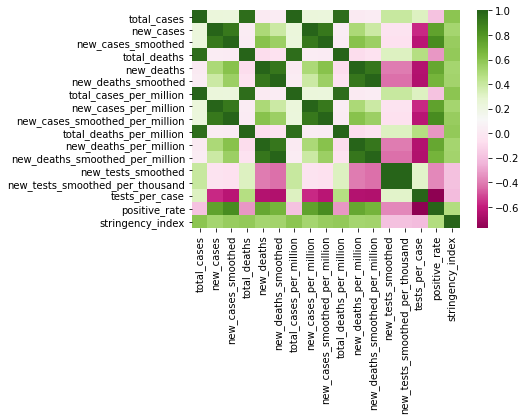

In [28]:
sns.heatmap(germany_data[germany_data.columns[0:22]].corr(), cmap='PiYG')

Here we can observe the correlation between variables. 
A darker green indicates a more positive correlation, while a darker pink a more negative correlation. 



## SIR MODEL

We will simulate the Covid-19 outbreak in Germany using the SIR model. 
The SIR model divides a given population into three groups: susceptible, infectious, and removed. As time passes by, the number of people in each of these groups changes.

The three dependent variables, S, I, and R, represent the three possible segments of a given population with N, number of people.

### *S + I + R = N*

The rate of change of the susceptible individuals over time can be expressed as-

### *ds/dt = -β x s(t) x i(t)*
The parameter, β, is used to represent the chance that an infectious individual will transmit the disease to a susceptible individual. 

The rate of change of the removed group at any given time can be given as-

### *dr/dt = γ x i(t)*
The rate at which infectious individuals moves into the removed group, R, is called γ. The average number of days it takes for an individual to recover from the disease, n, is inversely proportional to γ.

The rate of change for i(t) is given by-
### *di/dt= β x s(t) x i(t) - γ x i(t)*

Reproduction number, R0, is the expected number of secondary cases produced by a single (typical) infection in a completely susceptible population.

### *R0= β/γ*

In [29]:
# For value of R0, we will refer to another database. 
r0_data= pd.read_csv('../dataset/linear-comprehensive-covid-data.csv')
r0_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [30]:
# Extracting Germany data
germany_r0_data=r0_data[r0_data['location']=='Germany']
germany_r0_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
26027,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26028,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26029,DEU,Europe,Germany,2020-01-29,4.0,0.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26030,DEU,Europe,Germany,2020-01-30,4.0,0.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26031,DEU,Europe,Germany,2020-01-31,5.0,1.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947


In [31]:
# now we will find mean reproduction rate from this dataset and use it for our modeling
mean_r0= germany_r0_data['reproduction_rate'].mean()
mean_r0

1.1514588859416446

In [32]:
#initial number of infected will be taken from the dataset
for i in germany_data['total_cases']:
    if i>0:
        break
i

1.0

Initial conditions are as follows-

1. Reproduction number R0= 1.151 (mean_r0)
2. Infectious period t_infectious= 3.3 days
3. Incubation period t_incubation= 5.1 days 

(this information- Boldog, P.; Tekeli, T.; Vizi, Z.; Dénes, A.; Bartha, F.A.; Röst, G. Risk Assessment of Novel Coronavirus COVID-19 Outbreaks Outside China. J. Clin. Med. 2020, 9, 571. https://doi.org/10.3390/jcm9020571)

4. Population N = 83783945 (from the dataset germany_data)
5. Initial number of infected people i0= 1

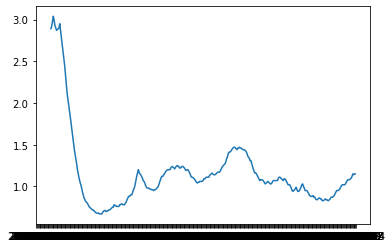

In [33]:
figur= plt.figure()
axis= figur.add_subplot(1,1,1)

axis.plot(germany_r0_data['date'],germany_r0_data['reproduction_rate'])

Dividing our model into 4 periods- 

1. Initial date to peak of first wave
2. Initial date to end of first wave
3. Peak of first wave to end of first wave
4. Beginning of second wave to end date

Finding data for first and second wave-
1. Peak of first wave- 3 April, 2020
2. End of first wave- 10 May, 2020
3. Beginning of second wave- 1 October, 2020

(Data from https://covid19.who.int/region/euro/country/de)

Thus, no. of days in each period-
1. 27 Jan to 3 April= 67 days
2. 27 Jan to 10 May= 104 days
3. 3 April to 10 May= 38 days
4. 1 October to 15 October= 15 days

In [34]:
#Finding mean R0 for each period

r0_p1= germany_r0_data['reproduction_rate'][0:67].mean()
r0_p2= germany_r0_data['reproduction_rate'][0:104].mean()
r0_p3= germany_r0_data['reproduction_rate'][67:105].mean()
r0_p4= germany_r0_data['reproduction_rate'][285:290].mean()

print(r0_p1, r0_p2, r0_p3, r0_p4)

2.3806249999999993 1.537391304347826 0.8052631578947369 1.172


### Some questions 

#germany_data[germany_data['date']=='2020-04-03']['total_cases']  



for any particular day  
s+i+r=n

n= population  
i= active cases---- unavailable  
i+r= total cases---- available  
s= n-(i+r)----- can be calculated  

i= ?  
r=?  
r= recovered+dead  
recovered---- unavailable  
dead----- available

In [35]:
#initializing the variables for each period-

R0_1= r0_p1
R0_2= r0_p2
R0_3= r0_p3
R0_4= r0_p4
t_infectious= 3.3
t_incubation= 5.1

N= germany_data['population'][0]

i_init1= 1/N
r_init1= 0
s_init1= (N-1)/N

i_init2= 1/N
r_init2= 0
s_init2= (N-1)/N

#initial conditions for periods 3 and 4.. how??


gamma = 1/t_infectious
beta1 = R0_1*gamma
beta2 = R0_2*gamma
beta3 = R0_3*gamma
beta4 = R0_4*gamma

In [36]:
# defining the differential equations for SIR model

def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]


In [37]:
from scipy.integrate import odeint

In [38]:
#solving the set of diff equations using scipy's odeint function

t1 = np.linspace(0, 67, 67)
t2 = np.linspace(0, 104, 104)
t3 = np.linspace(0, 38, 38)
t4 = np.linspace(0, 15, 15)

x_init1 = s_init1, i_init1, r_init1
soln1 = odeint(deriv, x_init1, t1, args=(beta1, gamma))
s1, i1, r1 = soln1.T

x_init2 = s_init2, i_init2, r_init2
soln2 = odeint(deriv, x_init2, t2, args=(beta2, gamma))
s2, i2, r2 = soln2.T

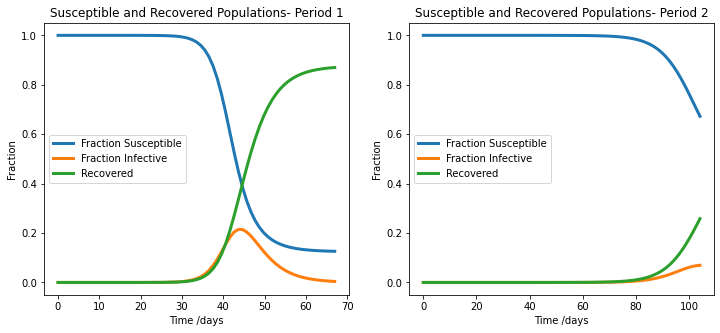

In [39]:
fig= plt.figure()
ax1= fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(t1, s1, lw=3, label='Fraction Susceptible')
ax1.plot(t1, i1, lw=3, label='Fraction Infective')
ax1.plot(t1, r1, lw=3, label='Recovered')
ax1.set_title('Susceptible and Recovered Populations- Period 1')
ax1.set_xlabel('Time /days')
ax1.set_ylabel('Fraction')
ax1.legend()

ax2.plot(t2, s2, lw=3, label='Fraction Susceptible')
ax2.plot(t2, i2, lw=3, label='Fraction Infective')
ax2.plot(t2, r2, lw=3, label='Recovered')
ax2.set_title('Susceptible and Recovered Populations- Period 2')
ax2.set_xlabel('Time /days')
ax2.set_ylabel('Fraction')
ax2.legend(loc='center left')

fig.set_figheight(5)
fig.set_figwidth(12)

plt.show()

In [40]:
s1[-1]

0.12608517882870265

In [ ]:
x_init3 = s_init1, i_init1, r_init1
soln1 = odeint(deriv, x_init1, t1, args=(beta1, gamma))
s1, i1, r1 = soln1.T#incomplete